# Exploratory data analysis

Import libraries and the dataset.

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [166]:
banknote=pd.read_csv('banknote.csv')
banknote

,V1,V2
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
1367,0.40614,1.34920
1368,-1.38870,-4.87730
1369,-3.75030,-13.45860
1370,-3.56370,-8.38270


Check if any missing value.

In [167]:
print(banknote.isnull().sum())

V1    0
V2    0
dtype: int64


Summary statistics.

In [168]:
banknote.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


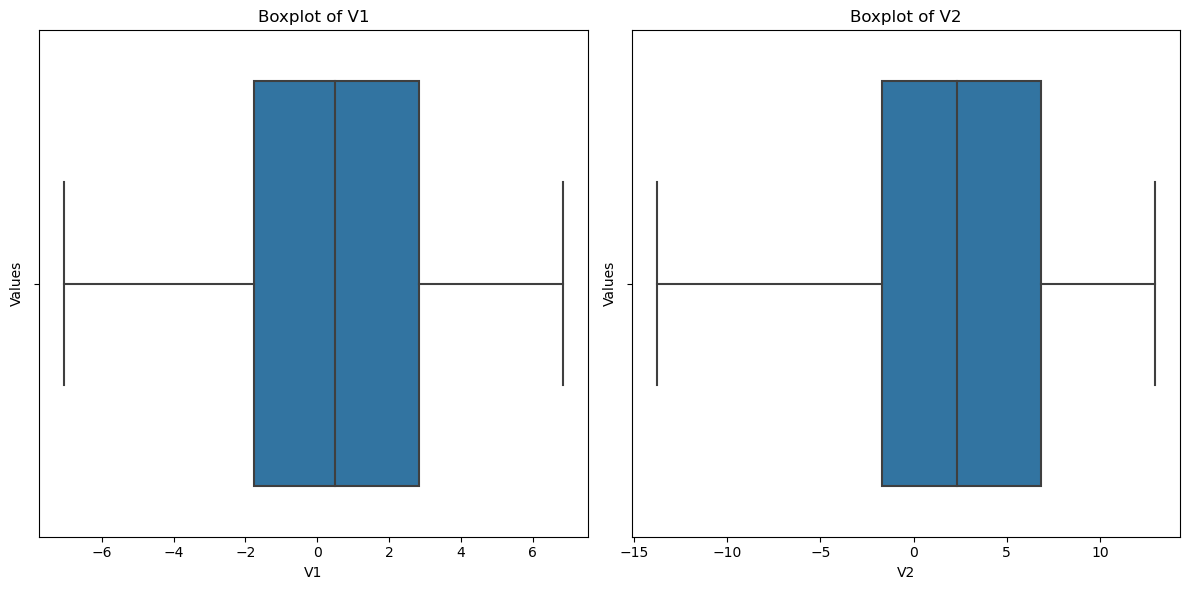

In [169]:
# boxplot
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for V1
sns.boxplot(x='V1', data=banknote, ax=axes[0])
axes[0].set_title('Boxplot of V1')
axes[0].set_ylabel('Values')

# Boxplot for V2
sns.boxplot(x='V2', data=banknote, ax=axes[1])
axes[1].set_title('Boxplot of V2')
axes[1].set_ylabel('Values')

plt.tight_layout()
plt.show()

The banknote dataset contains 1372 observations and 2 features. No missing value is found. 

In the exploratory data analysis process, it is found that the mean and standard deviation of V1 are 0.43 and 2.84 respectively, while the mean and standard deviation of V2 are 1.92 and 5.87 respectively. Also, as the range of the two features is different, feature scaling or standardization is adopted to mitigate the sensitivity of the input features and improve the stability of the machine learning models.  

The banknote dataset is suitable for K mean clustering as both features are numerical data types. 

Standardize the data.

In [170]:
banknote['V1']=(banknote['V1']-np.mean(banknote['V1']))/np.std(banknote['V1'])
v1=banknote['V1']
v1

0       1.121806
1       1.447066
2       1.207810
3       1.063742
4      -0.036772
          ...   
1367   -0.009711
1368   -0.641313
1369   -1.472357
1370   -1.406693
1371   -1.047122
Name: V1, Length: 1372, dtype: float64

In [171]:
banknote['V2']=(banknote['V2']-np.mean(banknote['V2']))/np.std(banknote['V2'])
v2=banknote['V2']
v2

0       1.149455
1       1.064453
2      -0.777352
3       1.295478
4      -1.087038
          ...   
1367   -0.097693
1368   -1.158984
1369   -2.621646
1370   -1.756471
1371   -0.439822
Name: V2, Length: 1372, dtype: float64

In [172]:
banknote.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,1372.0,-4.143106e-17,1.000365,-2.630737,-0.776547,0.021974,0.840243,2.249008
V2,1372.0,-4.143106e-17,1.000365,-2.675252,-0.618819,0.067718,0.833876,1.879908


Visualize the data.

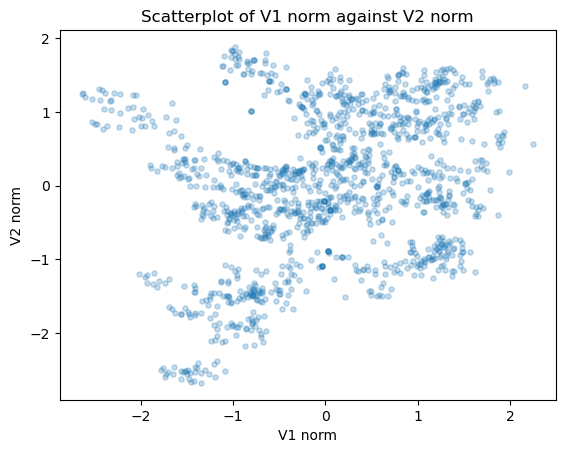

In [173]:
# scatterplot
plt.scatter(v1,v2, s=14, alpha=0.25)
plt.title('Scatterplot of V1 norm against V2 norm')
plt.xlabel('V1 norm')
plt.ylabel('V2 norm')
plt.show()

# Modelling

In [174]:
v1v2=np.column_stack((v1,v2))
v1v2

array([[ 1.12180565,  1.14945512],
       [ 1.44706568,  1.06445293],
       [ 1.20780971, -0.77735215],
       ...,
       [-1.47235682, -2.62164576],
       [-1.40669251, -1.75647104],
       [-1.04712236, -0.43982168]])

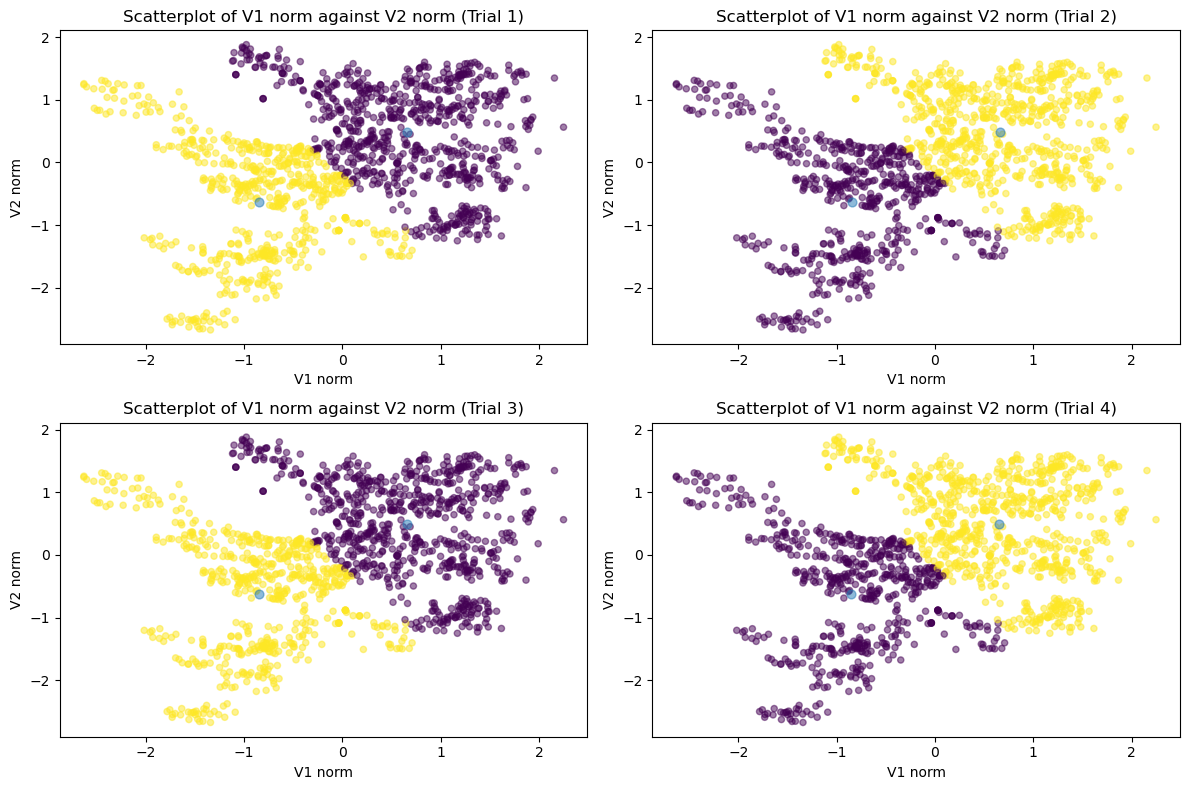

In [175]:
fig, ax=plt.subplots(2,2, figsize=(12,8))
ax=ax.flatten()

for i in range(4):
    
    km_res=KMeans(n_clusters=2, n_init=10).fit(v1v2)
    cluster=km_res.cluster_centers_
    y_kmeans=km_res.predict(v1v2)
    
    ax[i].scatter(v1v2[:,0],v1v2[:,1], c=y_kmeans, s=20, alpha=0.5)
    ax[i].scatter(cluster[:,0], cluster[:,1], s=40, alpha=0.5)
    ax[i].set_title(f'Scatterplot of V1 norm against V2 norm (Trial {i+1})')
    ax[i].set_xlabel('V1 norm')
    ax[i].set_ylabel('V2 norm')
    
    cluster_labels = km_res.labels_

plt.tight_layout()
plt.show()

After several times of re-running the K mean algorithm, it is revealed that the clusters become stable. The 2 clusters are visualized in two colours, yellow and purple, in which the first cluster has the centres of -1 and -0.5 (x coordinate and y coordinate), and the second cluster has the centres of 1 and 0.5 (x coordinate and y coordinate).